In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
import shutil
from os.path import join

module_path = os.path.abspath(os.path.join('../../..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.gen_config as gc
import _ressources.analysis_tools.lumenfate as lf


from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/pumping/2lumens'

theta = np.pi/3.
mu = np.sin(theta)**2 / (2*theta - np.sin(2*theta))


# Panel A

In [2]:
def import_outsaving() :
    out = []
    f = open('fates_2lumens.txt', 'r')
    for line in f.readlines() :
        out += [line]
    return out

def plot_fates(out) :
    plt.figure(figsize=(8,8))

    scale = 'log'

    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(7e-3, 1.5e2)
    plt.ylim(7e-5, 1.5e2)
    
    for i in range(1,len(out)) :
        line = out[i].split()
        x, y = float(line[0]), float(line[1])
        color = line[2]
        symbol = line[3]
        plt.scatter(x, y, color = color, marker=symbol, s=30)
    
    plt.xlabel(r'Pressure screening length $\chi_v$', fontsize=25)
    plt.ylabel(r'Active pumping rate in lumen 1 $(\bar{j}^a_1)$', fontsize=25)
    plt.title(r'2-lumen fate diagram ($\chi_s=1$)', fontsize=25)
    plt.savefig('figure3_panelA.eps', format='eps')
    plt.show()

In [3]:
out = import_outsaving()

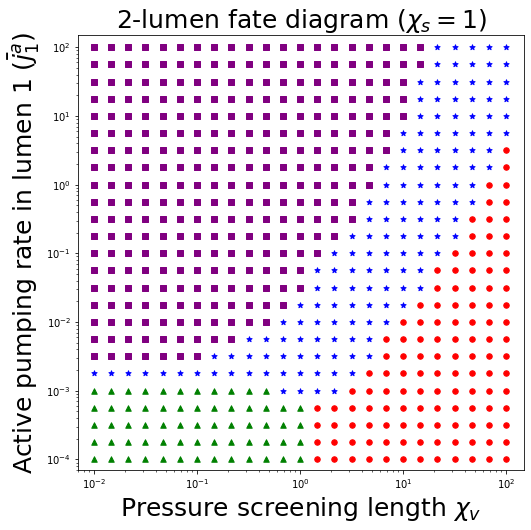

In [4]:
plot_fates(out)

Fate diagram for 2 lumens as function of the active pumping $\bar{j}^a_1$ of lumen 1 and pressure screening length $\chi_v$, at fixed $\chi_s=1$. Four behaviors are found numerically :
- Collapse (green triangles) for large screening and low pumping
- Coarsening (red circles) and Reversed coarsening (blue stars) at intermediates values
- Coalescence for large pumping (purple squares).

# Panel B

In [5]:
savefig=0

## First case : collapse

Import config from /Users/mathieuleverge/git/hydroosmotic_chain/_notebook/notebook_data/figure3/case1/config
======= CHAIN =======
Type         : hydroosmotic
Total length : 15.2
Current Time : 0
Screening lengths : 
        xi_s = 0.9999999999999996
        xi_v = 0.6812999999999997
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : None
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 6.00000 with length 1.00000 and 1.63783 ions with pumping 0.00032
Lumen 2 is at position 9.10000 with length 1.10000 and 1.98177 ions with pumping 0.00000
Lumen -1 is at position 15.20000 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 1.00000 with pumping 0.00016
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000

Import successful !


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


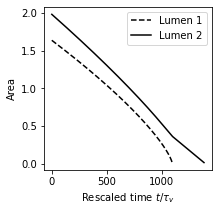

In [6]:
subdir = 'case1'
conf, ch = chain.load_config(os.path.join(subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
#tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(subdir, 'sim_bridges.dat'))

x_log = 0

L, nions, pos = tools.load_file(os.path.join(subdir, 'sim_all.dat'), hydroosmotic=True)
#tools.plot_evolution(L, nions, ell, x_logscale=x_log, savename=join(main_dir, 'case1.eps'), savefig=False, nbins=5)

plt.figure(figsize=(3, 3))
plt.plot(L[:, 0], L[:, 1]**2/mu, label = 'Lumen 1', color='k', linestyle = '--')
plt.plot(L[:, 0], L[:, 2]**2/mu, label = 'Lumen 2', color='k', linestyle = '-')
plt.xlabel(r'Rescaled time $t/\tau_v$', fontsize=10)
plt.ylabel('Area', fontsize=10)
plt.legend()
plt.savefig('figure3_panelB_case1.eps')
plt.show()

## Second case : coalescence

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Import config from /Users/mathieuleverge/git/hydroosmotic_chain/_notebook/notebook_data/figure3/case2/config
======= CHAIN =======
Type         : hydroosmotic
Total length : 15.2
Current Time : 0
Screening lengths : 
        xi_s = 0.9999999999999996
        xi_v = 0.6812999999999997
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : None
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 6.00000 with length 1.00000 and 1.63783 ions with pumping 0.03162
Lumen 2 is at position 9.10000 with length 1.10000 and 1.98177 ions with pumping 0.00000
Lumen -1 is at position 15.20000 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 1.00000 with pumping 0.01581
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000

Import successful !


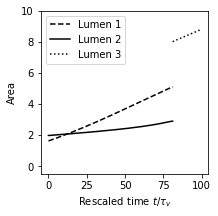

In [10]:
subdir = 'case2'
conf, ch = chain.load_config(os.path.join(subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
#tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(subdir, 'sim_bridges.dat'))

x_log = 0

L, nions, pos = tools.load_file(os.path.join(subdir, 'sim_all.dat'), hydroosmotic=True)
#tools.plot_evolution(L, nions, ell, x_logscale=x_log, savename=join(main_dir, 'case1.eps'), savefig=False, nbins=5)

plt.figure(figsize=(3, 3))
plt.plot(L[:, 0], L[:, 1]**2/mu, label = 'Lumen 1', color='k', linestyle = '--')
plt.plot(L[:, 0], L[:, 2]**2/mu, label = 'Lumen 2', color='k', linestyle = '-')
plt.plot(L[:, 0], L[:, 3]**2/mu, label = 'Lumen 3', color='k', linestyle = 'dotted')
plt.xlabel(r'Rescaled time $t/\tau_v$', fontsize=10)
plt.ylim(-0.5, 10)
plt.ylabel('Area', fontsize=10)
plt.legend()
plt.savefig('figure3_panelB_case2.eps')
plt.show()

## Third case : reversed coarsening

Import config from /Users/mathieuleverge/git/hydroosmotic_chain/_notebook/notebook_data/figure3/case3/config
======= CHAIN =======
Type         : hydroosmotic
Total length : 15.2
Current Time : 0
Screening lengths : 
        xi_s = 0.9999999999999996
        xi_v = 0.6812999999999997
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : None
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 6.00000 with length 1.00000 and 1.63783 ions with pumping 0.00316
Lumen 2 is at position 9.10000 with length 1.10000 and 1.98177 ions with pumping 0.00000
Lumen -1 is at position 15.20000 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 1.00000 with pumping 0.00158
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000

Import successful !


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


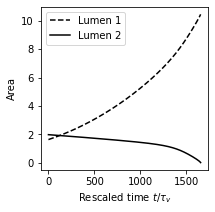

In [8]:
subdir = 'case3'
conf, ch = chain.load_config(os.path.join(subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
#tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(subdir, 'sim_bridges.dat'))

x_log = 0

L, nions, pos = tools.load_file(os.path.join(subdir, 'sim_all.dat'), hydroosmotic=True)
#tools.plot_evolution(L, nions, ell, x_logscale=x_log, savename=join(main_dir, 'case1.eps'), savefig=False, nbins=5)

plt.figure(figsize=(3, 3))
plt.plot(L[:, 0], L[:, 1]**2/mu, label = 'Lumen 1', color='k', linestyle = '--')
plt.plot(L[:, 0], L[:, 2]**2/mu, label = 'Lumen 2', color='k', linestyle = '-')
plt.xlabel(r'Rescaled time $t/\tau_v$', fontsize=10)
plt.ylabel('Area', fontsize=10)
plt.legend()
plt.savefig('figure3_panelB_case3.eps')
plt.show()

## Fourth case : coarsening

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Import config from /Users/mathieuleverge/git/hydroosmotic_chain/_notebook/notebook_data/figure3/case4/config
======= CHAIN =======
Type         : hydroosmotic
Total length : 15.2
Current Time : 0
Screening lengths : 
        xi_s = 0.9999999999999996
        xi_v = 21.53999999999999
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : None
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 6.00000 with length 1.00000 and 1.63783 ions with pumping 0.00316
Lumen 2 is at position 9.10000 with length 1.10000 and 1.98177 ions with pumping 0.00000
Lumen -1 is at position 15.20000 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 1.00000 with pumping 0.00158
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000

Import successful !


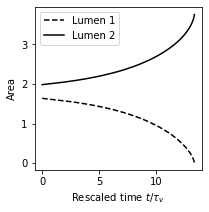

In [9]:
subdir = 'case4'
conf, ch = chain.load_config(os.path.join(subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
#tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(subdir, 'sim_bridges.dat'))

x_log = 0

L, nions, pos = tools.load_file(os.path.join(subdir, 'sim_all.dat'), hydroosmotic=True)
#tools.plot_evolution(L, nions, ell, x_logscale=x_log, savename=join(main_dir, 'case1.eps'), savefig=False, nbins=5)

plt.figure(figsize=(3, 3))
plt.plot(L[:, 0], L[:, 1]**2/mu, label = 'Lumen 1', color='k', linestyle = '--')
plt.plot(L[:, 0], L[:, 2]**2/mu, label = 'Lumen 2', color='k', linestyle = '-')
plt.xlabel(r'Rescaled time $t/\tau_v$', fontsize=10)
plt.ylabel('Area', fontsize=10)
plt.legend()
plt.savefig('figure3_panelB_case4.eps')
plt.show()